# Practical 1#

In this practical you will solve a number of linear regression problems using both linear algebra based approach and machine learning models. Linear regression model can be represented as the following equation:
$$
y=\beta_0 + \beta_1x_1 + \dots +\beta_kx_k
$$

where $x_i$ are the features of $x$, $y$ represent class label of $x$ and $\beta_0 \dots \beta_k$ are the parameters of the model. Solving linear regression model means finding the values of the parameters using training data.

## Task 1##

We will start with solving a simple regression problem using linear algebra.

**T1.1 Run the cell below to generate your input/output data**

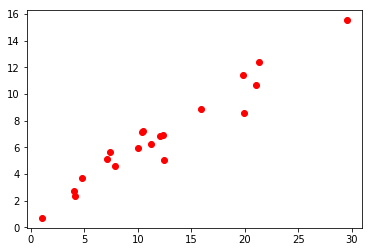

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA 

# input values from 0 to 30
inputs = 30 * np.random.random((20, 1)) #20-1 array,0,30
# output = a*input + b with noise
outputs = 0.5 * inputs + 1.0 + np.random.normal(size=inputs.shape)
plt.plot(inputs,outputs,'ro')

***
**T1.2 Including bias** 

In order to represent the linear regression equation in matrix notation we need to add vector of ones to our input data. This can be done by creating a column of ones and concatenating ([numpy.concatenate](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html)) it with your input data.

In [64]:
#Adding bias
bias=np.ones((20,1))
x=np.concatenate((bias,inputs),1)
x

array([[ 1.        , 19.79196031],
       [ 1.        ,  1.04681687],
       [ 1.        ,  3.99637361],
       [ 1.        , 29.49701336],
       [ 1.        ,  7.83795442],
       [ 1.        , 10.37751207],
       [ 1.        ,  9.96428537],
       [ 1.        , 12.35476335],
       [ 1.        ,  7.34467257],
       [ 1.        , 10.44541333],
       [ 1.        , 15.89842306],
       [ 1.        , 19.89119364],
       [ 1.        , 21.34163919],
       [ 1.        ,  4.1184548 ],
       [ 1.        , 11.18432931],
       [ 1.        , 12.01838042],
       [ 1.        ,  4.76773272],
       [ 1.        ,  7.11913971],
       [ 1.        , 21.03316399],
       [ 1.        , 12.4338488 ]])

***
**T1.3 Finding parameters (coefficients) of the regression models**

Using linear algebra and the generated data, find the coefficients $\beta=(\beta_0, \beta_1)$ by solving the equation from the lecture: $\beta=(X^TX)^{-1}X^TY$

In [8]:
XT=np.transpose(x)
XTX=np.dot(XT,x)
XTY=np.dot(XT,outputs)
coe = LA.inv(XTX)@XTY
coe

array([[1.08371521],
       [0.46992866]])

***
**T1.4. Visualizing the model**

Plot the graph of the linear model (line: $y=\beta_0+\beta_1x_1$) together with the raw data points (inputs/outputs) using [matplotlib](https://matplotlib.org/tutorials/introductory/pyplot.html) in order to see how well the model fits the data.

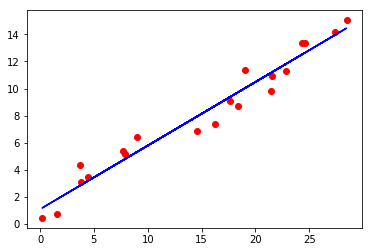

In [9]:
plt.plot(inputs,outputs, 'or', inputs, x@coe, 'b-')

***
**T1.4 Finding coefficient of Ridge regression model**

Using linear algebra and the generated data, find coefficients of a Ridge regression model. Ridge model is obtained by adding regularizer to the loss function of the linear regression model. The coefficients of the model can be found with the following formula: $\beta=(X^TX + \lambda I)^{-1}X^TY$. We can set $\lambda = 0.5.$

In [10]:
#calculate regression coefficients with regularisation
B1 = LA.inv(XTX + 0.5*np.eye(x.shape[1]))@XTY #I is identity matrix
B1

array([[0.99339385],
       [0.47437013]])

***
**T1.5 Visualizing th model**

As previously, use matplotlib to see how well the model fits the data.

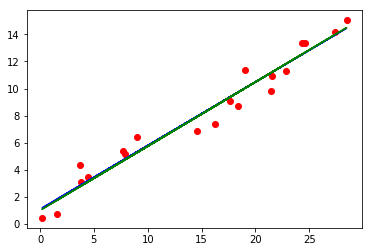

In [11]:
plt.plot(inputs,outputs, 'or', inputs, x@coe, 'b-', inputs, x@B1, 'g-')

## Task 2

In this task you will build linear and ridge regression models for predicting wine quality. You will use linear algebra based approach and also models from scikit-learn library for comparison.

***
**T2.1 Loading dataset with Pandas**

In this task we use pandas library to read data from a csv file. Familiarize yourself with the wine quality dataset presented below.

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from numpy import linalg as LA 
#reading data with panda
df = pd.read_csv('winequality.csv')

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
df.shape

(1599, 12)

***
**T2.2 Extracting input and output variables**

The first 11 features are the input variables and the last feature ('quality') is the output variable. You will have to extract the required values using appropriate methods from Pandas library. As in Task one, you should store your input and output variables in two separate matrices.

In [12]:
#select input and output variables
inputs=df.values[:,:-1]
outputs=df.values[:,11]

Check whether the data was extracted correctly.

In [13]:
print(inputs.shape)
print(inputs)

(1599, 11)
[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]


In [14]:
print(outputs.shape)
print(outputs)

(1599,)
[5. 5. 5. ... 6. 5. 6.]


***
**T2.3 Splitting data into training and testing set**

Split the inputs and outputs data into training and testing set (50% for testing and 50% for training). You can do this manually (i.e. by splitting each matrix in half) or using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from `sklearn.model_selection` (refer to the lecture).

In [15]:
#split the dataset into training and testing sample
x_train,x_test,y_train,y_test=train_test_split(inputs,
                                              outputs,
                                              train_size=0.5,
                                              test_size=0.5,
                                              random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(799, 11)
(799,)
(800, 11)
(800,)


***
**T2.4 Including bias**

As previously, modify the input data so that we can use matrix notation to solve the linear regression problem.

In [28]:
x_train_bias = np.concatenate((np.ones([x_train.shape[0],1]), x_train), 1)
x_test_bias = np.concatenate((np.ones([x_test.shape[0],1]), x_test), 1)

[[ 1.    9.3   0.4  ...  3.22  0.55  9.4 ]
 [ 1.    8.8   0.6  ...  3.36  0.49  9.1 ]
 [ 1.   10.7   0.35 ...  3.15  0.65 11.  ]
 ...
 [ 1.    7.9   0.57 ...  3.29  0.69  9.5 ]
 [ 1.   13.    0.47 ...  3.3   0.68 12.7 ]
 [ 1.    9.8   0.98 ...  3.25  0.48  9.4 ]]


***
**T2.5 Finding parameters (coefficients) of the regression models**

Using linear algebra and the training data (as in Task 1) find coefficients of the linear regression models.

In [24]:
#Using linear algebra to solve linear regression task on the training dataset (i.e. find the coefficients)
B = LA.inv(x_train_bias.T@x_train_bias)@x_train_bias.T@y_train
B

(12,)


***
**T2.6 Predicting output values for instances from the testing set**

Use the obtained regression model to predict output values for the instances from the testing dataset. 

In [32]:
#Use the coefficients to predict the output values for the instances from the testig dataset
predictions=B@np.transpose(x_test_bias)

***
**T2.6 Evaluating the linear regression model**

Evaluate how well the model did by calculating the mean absolute and the mean square error using the ground truth values. You can use metrics from [sklearn library](http://scikit-learn.org/stable/modules/model_evaluation.html).

In [33]:
e1_r = (np.abs(predictions - y_test)).mean()

#mean square error
e2_r = (np.square(predictions - y_test)).mean()

print('Mean absolute error: ', e1_r)
print('Mean square error: ', e2_r)

Mean absolute error:  0.5073001307579691
Mean square error:  0.4281774662475391


***
**T2.7 Training linear regression model using scikit-learn library**

Now, for comparison, create and evaluate linear regression model using [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) library.

In [34]:
reg=LinearRegression(fit_intercept=True)
reg.fit(x_train,y_train)
prediction1=reg.predict(x_test)
e1_r = (np.abs(prediction1 - y_test)).mean()

#mean square error
e2_r = (np.square(prediction1 - y_test)).mean()

print('Mean absolute error: ', e1_r)
print('Mean square error: ', e2_r)

Mean absolute error:  0.5073001301029523
Mean square error:  0.4281774656807189


***
**T2.8 Finding parameters of Ridge regression model**

Now repeat the same procedure but instead of the standard linear regression model, use ridge regression model.

- Use linear algebra to create the model on training data (`alpha=.5`)
- Evaluate the model on testing data
- Use [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) library to create the model on training data
- Evaluate the model on testing data

In [37]:
#Do the same but with ridge regression
#Using linear algebra, lambda = 0.5
B1 = LA.inv(x_train_bias.T@x_train_bias + 0.5*np.eye(x_train_bias.shape[1]))@x_train_bias.T@y_train
predictions=x_test_bias@B1 ????????????????????????????????????????????????
e1_r = (np.abs(predictions - y_test)).mean()

#mean square error
e2_r = (np.square(predictions - y_test)).mean()

print('Mean absolute error: ', e1_r)
print('Mean square error: ', e2_r)

Mean absolute error:  0.5078012213195049
Mean square error:  0.4256691793139733


In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=.5)
ridge.fit(x_train,y_train)
prediction2=ridge.predict(x_test)
e1_r = (np.abs(prediction2 - y_test)).mean()

#mean square error
e2_r = (np.square(prediction2 - y_test)).mean()

print('Mean absolute error: ', e1_r)
print('Mean square error: ', e2_r)

## Task 3

In this task we will evaluate the Ridge regression model using cross-validation

***
**T3.1 Using `cross_val_score` from [sklearn.model_selection](https://scikit-learn.org/stable/modules/cross_validation.html)** 

Use cross_val_score to perform 5-cross-validation for the ridge model with mean absolute error as the scoring function. Remember that this should be performed on the original input/output data. We don't need to split the data into training and testing sets. Average the results obtain for all 5 folds to obtain the final score.

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(ridge,inputs,outputs,cv=5)
scores.mean()

***
**T3.2 Useing `KFold` from [sklearn.model_selection](https://scikit-learn.org/stable/modules/cross_validation.html)**

Use KFold to perform 5-cross-validation. Train and evaluate the Ridge model with each fold.

In [ ]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5)
KFold(n_splits=5,random_state=None,shuffle=False)
for train_index,test_index in kf.split(inputs):
    ridge.fit(inputs[train_index],outputs[train_index])
    print(mean_absolute_error(outputs[test_index],ridge.predict(inputs[test_index])))

***
**T3.3 Useing `ShuffleSplit` from [sklearn.model_selection](https://scikit-learn.org/stable/modules/cross_validation.html)** 

Use `ShuffleSplit` instead of `KFold`.

In [ ]:
from sklearn.model_selection import ShuffleSplit
rs=ShuffleSplit(n_split=5,test_size=0.25,random_state=0)
for train_index,test_index in rs.split(inputs):
    ridge.fit(inputs[train_index],outputs[train_index])
    print(mean_absolute_error(outputs[test_index],ridge.predict(inputs[test_index])))